# Regression Tree Analysis for Grocery Store

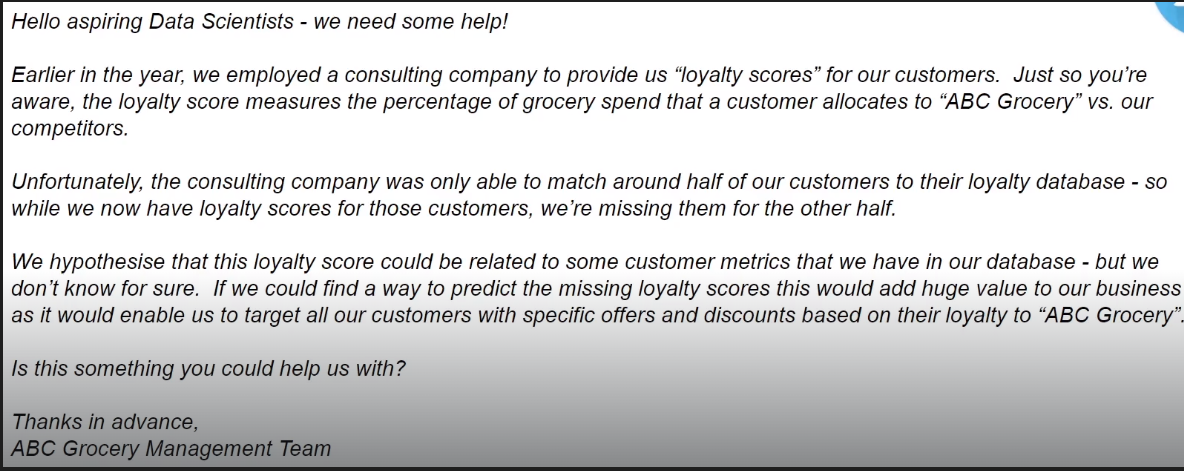

In [2]:
# import required packages
import pandas as pd
import pickle
# import required packages
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

In [3]:
# import, learning to import using pickle files
data_for_model = pickle.load(open('Saved_files/Groc_regression_modeling.p','rb'))

# we dont really need the id for the model
data_for_model.drop('customer_id', axis=1, inplace=True)
print(data_for_model.shape)
data_for_model.head()


(400, 9)


,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,avg_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800


In [4]:
# shuffle data just in case it either came in in some order
# or we accidentally ordered it which will cause model to error
data_for_model = shuffle(data_for_model,random_state=42)
print(data_for_model.shape)
data_for_model.head()
# 8 potential input vatiables and a single output variable to predict

(400, 9)


,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,avg_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167


In [5]:
######################################################
# deal with missing values
######################################################
data_for_model.isna().sum()
# small number of columns with missing values, lets not impute and just drop 
# but noted 

distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
total_sales               0
total_items               0
transaction_count         0
product_area_count        0
avg_basket_value          0
dtype: int64

In [6]:
# "any" meaning drop the whole row if any one cell is empty
data_for_model.dropna(how="any", inplace=True)
print(data_for_model.shape)
data_for_model.head()

(394, 9)


,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,avg_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167


In [7]:
# ######################################################
# # deal with outliers
# ######################################################
# outlier_investigation = data_for_model.describe()
# print(outlier_investigation)
# # some outliers in distance_from_store, total_sales, total_items
# # all others did not spark any issues

In [8]:
# #boxplot approach
# outlier_columns = ["distance_from_store", "total_sales", "total_items"]
# for column in outlier_columns:
#     lower_quartile = data_for_model[column].quantile(.25)
#     upper_quartile = data_for_model[column].quantile(.75)
#     iqr= upper_quartile - lower_quartile
#     iqr_extend = iqr *2 # 1.5 reason i dont want to cut out too many outliers
#     min_border = lower_quartile - iqr_extend
#     max_border = upper_quartile + iqr_extend

#     outliers = data_for_model[(data_for_model[column]<min_border)|(data_for_model[column]>max_border)].index
#     print(f"{len(outliers)} outliers detected in column {column}")

#     data_for_model.drop(outliers,inplace=True)

# print(data_for_model.shape)
# data_for_model.head()


In [9]:
######################################################
# split input variables and output variables
######################################################
# we dont want the output in the input dataframe
X = data_for_model.drop(['customer_loyalty_score'], axis=1)
Y = data_for_model['customer_loyalty_score']

In [10]:
######################################################
# split out training and test sets
######################################################
# Regression model 
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(315, 8)
(79, 8)
(315,)
(79,)


In [11]:
######################################################
# deal with categorical variables
######################################################
# gender
categorical_vars = ["gender"]
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")# array is easier to use and viduallize 
# avoid dummy variable trap

In [12]:
# fit and transform on the training and only the transform on the test
# we do this because we want the encoding rules to be learned from the 
# training data and then applied to the new data 
X_train_encoded_vars_array = one_hot_encoder.fit_transform(x_train[categorical_vars])
X_test_encoded_vars_array = one_hot_encoder.transform(x_test[categorical_vars])
print(X_train_encoded_vars_array.shape)
print(X_test_encoded_vars_array.shape)

(315, 1)
(79, 1)


c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

In [14]:
X_train_encoded_vars_array = pd.DataFrame(X_train_encoded_vars_array,
                               columns=encoder_feature_names)
x_train = pd.concat([x_train.reset_index(drop=True),
                   X_train_encoded_vars_array.reset_index(drop=True)], 
                   axis=1)
# reset index to ensure no rows are not aligned
# drop the original input 2 and 3
x_train.drop(categorical_vars, axis=1,inplace=True)
print(x_train.shape)
print(x_train.head())

(315, 8)
   distance_from_store  credit_score  total_sales  total_items  \
0                 0.04          0.67      1191.53          216   
1                 2.04          0.64      1581.41          343   
2                 2.24          0.63      1327.51          266   
3                 1.72          0.59      2094.10          352   
4                 0.24          0.53      1133.45          180   

   transaction_count  product_area_count  avg_basket_value  gender_M  
0                 53                   5         22.481698       1.0  
1                 41                   4         38.570976       0.0  
2                 48                   4         27.656458       0.0  
3                 34                   3         61.591176       1.0  
4                 56                   5         20.240179       1.0  


In [15]:
X_test_encoded_vars_array = pd.DataFrame(X_test_encoded_vars_array,
                               columns=encoder_feature_names)
x_test = pd.concat([x_test.reset_index(drop=True),
                   X_test_encoded_vars_array.reset_index(drop=True)], axis=1)
# reset index to ensure no rows are not aligned
# drop the original input 2 and 3
x_test.drop(categorical_vars, axis=1,inplace=True)
print(x_test.shape)
print(x_test.head())

(79, 8)
   distance_from_store  credit_score  total_sales  total_items  \
0                 2.27          0.49      1506.49          281   
1                 3.02          0.63      2401.64          278   
2                 2.72          0.57      1620.52          246   
3                 1.51          0.67      1785.67          331   
4                 1.34          0.57      1682.14          364   

   transaction_count  product_area_count  avg_basket_value  gender_M  
0                 47                   3         32.052979       0.0  
1                 50                   5         48.032800       0.0  
2                 53                   5         30.575849       0.0  
3                 53                   5         33.691887       1.0  
4                 47                   4         35.790213       1.0  


below each variable is judges indenpendently 
if high input variables, doing below will help for computation and alot of input variable

In [16]:
# ######################################################
# # feature selection
# ######################################################
# regressor = LinearRegression()
# feature_selector = RFECV(regressor)

# # trains the model and assess
# fit = feature_selector.fit(x_train,y_train)
# print(fit)

In [17]:
# optimal_feature_count = feature_selector.n_features_
# print(f"optimal number features: {optimal_feature_count}")
# #it says 8 which is all of them

In [18]:
# # we didnt really need to tun this becuse it sugested 
# # all 8 columns but i ran just cause 
# x_train  = x_train.loc[:,feature_selector.get_support()]
# x_test  = x_test.loc[:,feature_selector.get_support()]
# print(x_train)
# print(x_test)

in the other approaches there was guess work where as here it cut a lot of this and able to get reliable stuff

In [19]:
# plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), 
#          fit.cv_results_['mean_test_score'], 
#          marker = "o")
# plt.ylabel("Model Score")
# plt.xlabel("Number of Features")
# plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
# plt.tight_layout()
# plt.show()

In [20]:
######################################################
# model train
######################################################
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
######################################################
# model assessment
######################################################
# Predict on the Test Set 
y_pred = regressor.predict(x_test)

In [22]:
# Calculate R-Squared 
r_squared = r2_score(y_test,y_pred)
print(r_squared)

0.8981805706349476


In [23]:
# Cross Validation 
cv = KFold(n_splits=4,shuffle=True,random_state=42)
cv_scores =cross_val_score(regressor,x_train,y_train,cv=cv,scoring="r2")
print(cv_scores)

[0.88109048 0.86443565 0.88089505 0.87768524]


In [24]:
cv_scores.mean()

0.8760266035577694

In [25]:
# Calculate Adjusted R-Squared
num_data_points, num_input_vars = x_test.shape 
print(x_test.shape) 

(79, 8)


In [26]:
adjusted_r_squared = 1-(1-r_squared)*(num_data_points-1)/(num_data_points-num_input_vars-1)
print(adjusted_r_squared) 

0.8865440644217988


In [27]:
# # Extract Model Coefficients
# coefficients = pd.DataFrame(regressor.coef_)  
# print(coefficients) 

In [28]:
# input_variable_names = pd.DataFrame(x_train.columns)
# summary_stats = pd.concat([input_variable_names,coefficients],axis=1)
# summary_stats.columns = ['input_variable', 'coefficients']
# print(summary_stats)

In [29]:
# # Extract Model Intercept
# regressor.intercept_

In [30]:
# demonstration of over fitting
# decision trees are prone to this

# assess model accuracy
y_pred_training = regressor.predict(x_train)
r2_score(y_train,y_pred_training)

1.0

In [32]:
# finding the best max depth
max_depth_list = list(range(1,9))
accuracy_scores = []

for depth in max_depth_list:
    regressor = DecisionTreeRegressor(max_depth=depth,random_state=42)
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)

[0.48041516747913704, 0.749628862008641, 0.8434993278383679, 0.8666832224200037, 0.8909700995376669, 0.8905579006885826, 0.8990238112614182, 0.8941316438857448]


In [33]:
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]
print(optimal_depth)

7


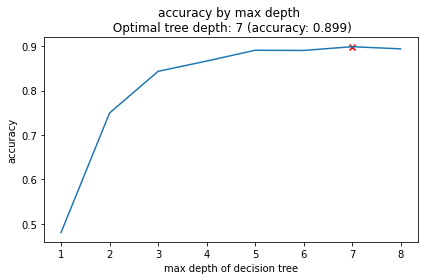

In [36]:
# plot of max depths
plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth,
            max_accuracy,
            marker='x',
            color='red')
plt.title(f'accuracy by max depth \n Optimal tree depth: {optimal_depth} (accuracy: {round(max_accuracy,4)})')
plt.xlabel('max depth of decision tree')
plt.ylabel('accuracy')
plt.tight_layout()
plt.show()


In [38]:
######################################################
# model train
######################################################
regressor = DecisionTreeRegressor(random_state=42,max_depth=4)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [39]:
######################################################
# model assessment
######################################################
# Predict on the Test Set 
y_pred = regressor.predict(x_test)
# Calculate R-Squared 
r_squared = r2_score(y_test,y_pred)
print(r_squared)

0.8666832224200037


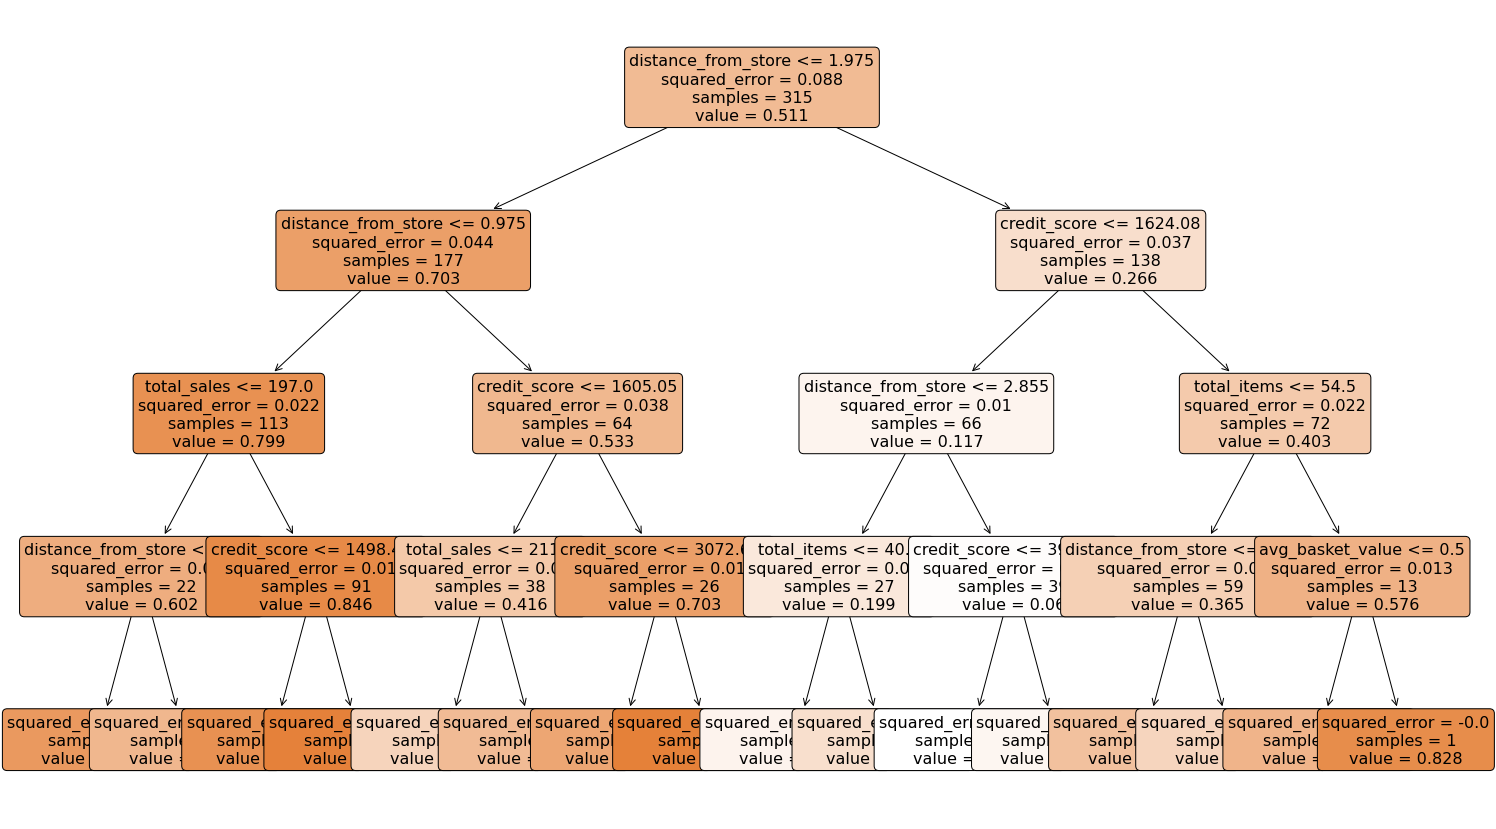

In [40]:
# plot our model
# plot our decision tree
plt.figure(figsize=(25,15))
tree = plot_tree(regressor,
                 feature_names=X.columns,
                 filled=True,
                 rounded = True,
                 fontsize=16)